In [1]:
import pandas as pd
import sys
import importlib
sys.path.append("../scripts/")
import regex_gradle
import rq_aux
import matplotlib.pyplot as plt
import os
importlib.reload(regex_gradle)
importlib.reload(rq_aux)
 #"small", "medium", "large"
sizes1 = rq_aux.sizes1

#"all", "small", "medium", "large"
sizes2 = rq_aux.sizes2 

In [2]:
regex = regex_gradle
plugins = regex.plugins
categories = regex.categories
categories_short = regex.categories_short
build_tool = "gradle"
noerror = False
output_path = "../data/output_data/"
overview_dataset = f"{output_path}overview_daylight_witherror.csv"
alltasks_dataset = f"{output_path}all_tasks_witherror.csv"
analysis_output = "figures"
os.makedirs(analysis_output, exist_ok=True)


In [3]:
rq_aux.check_categories(regex)

In [4]:
df = rq_aux.read_all_tasks(alltasks_dataset, build_tool, noerror)

Build tool gradle = 45259


In [5]:
tasks_energy_category = {}
tasks_energy_category['all'] = rq_aux.field_by_cat(df, 'energy', plugins, categories)

for x in sizes1:
    tasks_energy_category[x] = rq_aux.field_by_cat(df[df["size"] == x], 'energy', plugins, categories)

In [6]:
tasks_time_category = {}
tasks_time_category['all'] = rq_aux.field_by_cat(df, 'seconds', plugins, categories)

for x in sizes1:
    tasks_time_category[x] = rq_aux.field_by_cat(df[df["size"] == x], 'seconds', plugins, categories)

In [7]:
tasks_power_category = {}
tasks_power_category['all'] = rq_aux.power_by_cat(df, plugins, categories)

for x in sizes1:
    tasks_power_category[x] = rq_aux.power_by_cat(df[df["size"] == x], plugins, categories)

In [8]:
total_energy = 0
total_power = 0
for x in sizes1:
  for key, value in tasks_energy_category[x].items():
    total_energy += len(value)
    
  for key, value in tasks_power_category[x].items():
    total_power += len(value)

assert total_energy == len(df)
assert total_power == len(df)

In [9]:
total_energy = 0
total_power = 0
for key, value in tasks_energy_category['all'].items():
    print(key, len(value))
    total_energy += len(value)
    
for key, value in tasks_power_category['all'].items():
    print(key, len(value))
    total_power += len(value)


assert total_energy == len(df)
assert total_power == len(df)

Integration Test 256
Unit Test 2542
Compile 8466
Documentation 1888
Install 114
Linter 4035
Packaging 11374
Others 3319
Unclassified 13265
Integration Test 256
Unit Test 2542
Compile 8466
Documentation 1888
Install 114
Linter 4035
Packaging 11374
Others 3319
Unclassified 13265


In [10]:
rq_aux.calc_category_kruskall_mwu(tasks_time_category['all'])

Category: Integration Test, N: 256, median: 1599778.500
Category: Unit Test, N: 2542, median: 1798144.000
Category: Compile, N: 8466, median: 699436.000
Category: Documentation, N: 1888, median: 199486.000
Category: Install, N: 114, median: 1650318.500
Category: Linter, N: 4035, median: 799411.000
Category: Packaging, N: 11374, median: 500426.500
Category: Others, N: 3319, median: 199970.000
Category: Unclassified, N: 13265, median: 199920.000

Cats for Kruskall:  f['Integration Test', 'Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f[]

KruskalResult(statistic=np.float64(3155.166309111562), pvalue=np.float64(0.0))
Integration Test x Integration Test: EQUAL
Integration Test x Unit Test: EQUAL
Integration Test x Compile: Cliff small (0.260)
Integration Test x Documentation: Cliff large (0.477)
Integration Test x Install: EQUAL
Integration Test x Linter: Cliff small (0.244)
Integration Test x Packaging: Cliff medium

Linter x Documentation: Cliff small (0.273)
Linter x Install: Cliff small (-0.179)
Linter x Linter: EQUAL
Linter x Packaging: Cliff negligible (0.117)
Linter x Others: Cliff small (0.272)
Linter x Unclassified: Cliff small (0.327)

Packaging x Integration Test: Cliff medium (-0.334)
Packaging x Unit Test: Cliff medium (-0.337)
Packaging x Compile: Cliff negligible (-0.082)
Packaging x Documentation: Cliff small (0.154)
Packaging x Install: Cliff small (-0.281)
Packaging x Linter: Cliff negligible (-0.117)
Packaging x Packaging: EQUAL
Packaging x Others: Cliff small (0.171)
Packaging x Unclassified: Cliff small (0.221)

Others x Integration Test: Cliff medium (-0.459)
Others x Unit Test: Cliff medium (-0.450)
Others x Compile: Cliff small (-0.233)
Others x Documentation: Cliff negligible (-0.036)
Others x Install: Cliff medium (-0.399)
Others x Linter: Cliff small (-0.272)


Others x Packaging: Cliff small (-0.171)
Others x Others: EQUAL
Others x Unclassified: Cliff negligible (0.026)

Unclassified x Integration Test: Cliff large (-0.510)
Unclassified x Unit Test: Cliff large (-0.504)
Unclassified x Compile: Cliff small (-0.280)
Unclassified x Documentation: Cliff negligible (-0.061)
Unclassified x Install: Cliff medium (-0.442)
Unclassified x Linter: Cliff small (-0.327)
Unclassified x Packaging: Cliff small (-0.221)
Unclassified x Others: Cliff negligible (-0.026)
Unclassified x Unclassified: EQUAL



In [11]:
rq_aux.calc_category_kruskall_mwu(tasks_energy_category['all'])

Category: Integration Test, N: 256, median: 41.074
Category: Unit Test, N: 2542, median: 42.536
Category: Compile, N: 8466, median: 18.143
Category: Documentation, N: 1888, median: 11.574
Category: Install, N: 114, median: 25.178
Category: Linter, N: 4035, median: 18.455
Category: Packaging, N: 11374, median: 17.613
Category: Others, N: 3319, median: 11.645
Category: Unclassified, N: 13265, median: 9.048

Cats for Kruskall:  f['Integration Test', 'Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f[]

KruskalResult(statistic=np.float64(4430.007198259467), pvalue=np.float64(0.0))
Integration Test x Integration Test: EQUAL
Integration Test x Unit Test: EQUAL
Integration Test x Compile: Cliff small (0.193)
Integration Test x Documentation: Cliff medium (0.435)
Integration Test x Install: Cliff negligible (0.130)
Integration Test x Linter: Cliff small (0.169)
Integration Test x Packaging: Cliff small (0.289)
Integration 

Unit Test x Linter: Cliff small (0.203)
Unit Test x Packaging: Cliff small (0.321)
Unit Test x Others: Cliff medium (0.425)
Unit Test x Unclassified: Cliff large (0.532)

Compile x Integration Test: Cliff small (-0.193)
Compile x Unit Test: Cliff small (-0.227)
Compile x Compile: EQUAL
Compile x Documentation: Cliff small (0.267)
Compile x Install: EQUAL
Compile x Linter: Cliff negligible (-0.035)
Compile x Packaging: Cliff negligible (0.096)
Compile x Others: Cliff small (0.234)
Compile x Unclassified: Cliff medium (0.373)

Documentation x Integration Test: Cliff medium (-0.435)
Documentation x Unit Test: Cliff medium (-0.454)
Documentation x Compile: Cliff small (-0.267)
Documentation x Documentation: EQUAL
Documentation x Install: Cliff small (-0.261)
Documentation x Linter: Cliff small (-0.303)
Documentation x Packaging: Cliff small (-0.195)
Documentation x Others: Cliff negligible (-0.036)
Documentation x Unclassified: Cliff negligible (0.140)



Install x Integration Test: Cliff negligible (-0.130)
Install x Unit Test: Cliff small (-0.159)
Install x Compile: EQUAL
Install x Documentation: Cliff small (0.261)
Install x Install: EQUAL
Install x Linter: EQUAL
Install x Packaging: Cliff negligible (0.141)
Install x Others: Cliff small (0.237)
Install x Unclassified: Cliff medium (0.376)

Linter x Integration Test: Cliff small (-0.169)
Linter x Unit Test: Cliff small (-0.203)
Linter x Compile: Cliff negligible (0.035)
Linter x Documentation: Cliff small (0.303)
Linter x Install: EQUAL
Linter x Linter: EQUAL
Linter x Packaging: Cliff negligible (0.139)
Linter x Others: Cliff small (0.271)


Linter x Unclassified: Cliff medium (0.399)

Packaging x Integration Test: Cliff small (-0.289)
Packaging x Unit Test: Cliff small (-0.321)
Packaging x Compile: Cliff negligible (-0.096)
Packaging x Documentation: Cliff small (0.195)
Packaging x Install: Cliff negligible (-0.141)
Packaging x Linter: Cliff negligible (-0.139)
Packaging x Packaging: EQUAL
Packaging x Others: Cliff small (0.164)
Packaging x Unclassified: Cliff small (0.315)

Others x Integration Test: Cliff medium (-0.403)
Others x Unit Test: Cliff medium (-0.425)
Others x Compile: Cliff small (-0.234)
Others x Documentation: Cliff negligible (0.036)
Others x Install: Cliff small (-0.237)
Others x Linter: Cliff small (-0.271)


Others x Packaging: Cliff small (-0.164)
Others x Others: EQUAL
Others x Unclassified: Cliff small (0.163)

Unclassified x Integration Test: Cliff large (-0.507)
Unclassified x Unit Test: Cliff large (-0.532)
Unclassified x Compile: Cliff medium (-0.373)
Unclassified x Documentation: Cliff negligible (-0.140)


Unclassified x Install: Cliff medium (-0.376)
Unclassified x Linter: Cliff medium (-0.399)
Unclassified x Packaging: Cliff small (-0.315)
Unclassified x Others: Cliff small (-0.163)
Unclassified x Unclassified: EQUAL



In [12]:
rq_aux.calc_category_kruskall_mwu(tasks_power_category['all'])

Category: Integration Test, N: 256, median: 0.028
Category: Unit Test, N: 2542, median: 0.031
Category: Compile, N: 8466, median: 0.033
Category: Documentation, N: 1888, median: 0.033
Category: Install, N: 114, median: 0.025
Category: Linter, N: 4035, median: 0.034
Category: Packaging, N: 11374, median: 0.032
Category: Others, N: 3319, median: 0.033
Category: Unclassified, N: 13265, median: 0.028

Cats for Kruskall:  f['Integration Test', 'Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f[]

KruskalResult(statistic=np.float64(1208.5153974168352), pvalue=np.float64(1.3864016934107824e-255))
Integration Test x Integration Test: EQUAL
Integration Test x Unit Test: Cliff small (-0.148)
Integration Test x Compile: Cliff small (-0.253)
Integration Test x Documentation: Cliff small (-0.292)
Integration Test x Install: EQUAL
Integration Test x Linter: Cliff small (-0.295)
Integration Test x Packaging: Cliff small (-0.231)


Compile x Install: Cliff medium (0.381)
Compile x Linter: Cliff negligible (-0.056)
Compile x Packaging: Cliff negligible (0.022)
Compile x Others: EQUAL
Compile x Unclassified: Cliff small (0.197)

Documentation x Integration Test: Cliff small (0.292)
Documentation x Unit Test: Cliff small (0.150)
Documentation x Compile: Cliff negligible (0.034)
Documentation x Documentation: EQUAL
Documentation x Install: Cliff medium (0.442)
Documentation x Linter: EQUAL


Documentation x Packaging: Cliff negligible (0.057)
Documentation x Others: EQUAL
Documentation x Unclassified: Cliff small (0.234)

Install x Integration Test: EQUAL
Install x Unit Test: Cliff small (-0.278)
Install x Compile: Cliff medium (-0.381)
Install x Documentation: Cliff medium (-0.442)
Install x Install: EQUAL
Install x Linter: Cliff medium (-0.420)
Install x Packaging: Cliff medium (-0.352)
Install x Others: Cliff medium (-0.390)
Install x Unclassified: EQUAL

Linter x Integration Test: Cliff small (0.295)


Linter x Unit Test: Cliff small (0.166)
Linter x Compile: Cliff negligible (0.056)
Linter x Documentation: EQUAL
Linter x Install: Cliff medium (0.420)
Linter x Linter: EQUAL
Linter x Packaging: Cliff negligible (0.076)
Linter x Others: Cliff negligible (0.038)
Linter x Unclassified: Cliff small (0.229)

Packaging x Integration Test: Cliff small (0.231)
Packaging x Unit Test: Cliff negligible (0.088)
Packaging x Compile: Cliff negligible (-0.022)


Packaging x Documentation: Cliff negligible (-0.057)
Packaging x Install: Cliff medium (0.352)
Packaging x Linter: Cliff negligible (-0.076)
Packaging x Packaging: EQUAL
Packaging x Others: Cliff negligible (-0.039)
Packaging x Unclassified: Cliff small (0.177)



Others x Integration Test: Cliff small (0.268)
Others x Unit Test: Cliff negligible (0.127)
Others x Compile: EQUAL
Others x Documentation: EQUAL
Others x Install: Cliff medium (0.390)
Others x Linter: Cliff negligible (-0.038)
Others x Packaging: Cliff negligible (0.039)


Others x Others: EQUAL
Others x Unclassified: Cliff small (0.210)

Unclassified x Integration Test: EQUAL
Unclassified x Unit Test: Cliff negligible (-0.112)
Unclassified x Compile: Cliff small (-0.197)
Unclassified x Documentation: Cliff small (-0.234)
Unclassified x Install: EQUAL
Unclassified x Linter: Cliff small (-0.229)


Unclassified x Packaging: Cliff small (-0.177)
Unclassified x Others: Cliff small (-0.210)
Unclassified x Unclassified: EQUAL



In [13]:
rq_aux.calc_category_kruskall_mwu(tasks_energy_category['small'])

Category: Integration Test, N: 0, median: nan
Category: Unit Test, N: 73, median: 52.567
Category: Compile, N: 101, median: 22.686
Category: Documentation, N: 22, median: 3.396
Category: Install, N: 5, median: 12.546
Category: Linter, N: 117, median: 16.259
Category: Packaging, N: 310, median: 16.644
Category: Others, N: 69, median: 36.708
Category: Unclassified, N: 501, median: 16.119

Cats for Kruskall:  f['Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f['Integration Test']

KruskalResult(statistic=np.float64(58.70882345981954), pvalue=np.float64(2.7315660141908316e-10))
Unit Test x Unit Test: EQUAL
Unit Test x Compile: Cliff small (0.176)
Unit Test x Documentation: Cliff large (0.476)
Unit Test x Install: EQUAL
Unit Test x Linter: Cliff medium (0.408)
Unit Test x Packaging: Cliff medium (0.404)
Unit Test x Others: EQUAL
Unit Test x Unclassified: Cliff medium (0.392)

Compile x Unit Test: Cliff small (-0.176)
C

Compile x Unclassified: Cliff small (0.225)

Documentation x Unit Test: Cliff large (-0.476)
Documentation x Compile: Cliff medium (-0.378)
Documentation x Documentation: EQUAL
Documentation x Install: EQUAL
Documentation x Linter: EQUAL
Documentation x Packaging: Cliff small (-0.272)
Documentation x Others: Cliff medium (-0.406)
Documentation x Unclassified: EQUAL

Install x Unit Test: EQUAL
Install x Compile: EQUAL
Install x Documentation: EQUAL
Install x Install: EQUAL
Install x Linter: EQUAL
Install x Packaging: EQUAL
Install x Others: EQUAL
Install x Unclassified: EQUAL

Linter x Unit Test: Cliff medium (-0.408)
Linter x Compile: Cliff small (-0.256)
Linter x Documentation: EQUAL


Linter x Install: EQUAL
Linter x Linter: EQUAL
Linter x Packaging: EQUAL
Linter x Others: Cliff small (-0.292)
Linter x Unclassified: EQUAL

Packaging x Unit Test: Cliff medium (-0.404)
Packaging x Compile: Cliff small (-0.220)
Packaging x Documentation: Cliff small (0.272)
Packaging x Install: EQUAL
Packaging x Linter: EQUAL
Packaging x Packaging: EQUAL
Packaging x Others: Cliff small (-0.259)
Packaging x Unclassified: EQUAL

Others x Unit Test: EQUAL
Others x Compile: EQUAL
Others x Documentation: Cliff medium (0.406)
Others x Install: EQUAL
Others x Linter: Cliff small (0.292)
Others x Packaging: Cliff small (0.259)
Others x Others: EQUAL
Others x Unclassified: Cliff small (0.288)

Unclassified x Unit Test: Cliff medium (-0.392)
Unclassified x Compile: Cliff small (-0.225)
Unclassified x Documentation: EQUAL
Unclassified x Install: EQUAL
Unclassified x Linter: EQUAL
Unclassified x Packaging: EQUAL
Unclassified x Others: Cliff small (-0.288)
Unclassified x Unclassified: EQUAL



/home/rlefeuvr/Documents/Workspace/ICT4S_2025/energy-CI-CD/.venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rlefeuvr/Documents/Workspace/ICT4S_2025/energy-CI-CD/.venv/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [14]:
rq_aux.calc_category_kruskall_mwu(tasks_power_category['small'])

Category: Integration Test, N: 0, median: nan
Category: Unit Test, N: 73, median: 0.025
Category: Compile, N: 101, median: 0.030
Category: Documentation, N: 22, median: 0.030
Category: Install, N: 5, median: 0.009
Category: Linter, N: 117, median: 0.033
Category: Packaging, N: 310, median: 0.031
Category: Others, N: 69, median: 0.029
Category: Unclassified, N: 501, median: 0.032

Cats for Kruskall:  f['Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f['Integration Test']

KruskalResult(statistic=np.float64(44.90532771447761), pvalue=np.float64(1.4267066158463676e-07))
Unit Test x Unit Test: EQUAL
Unit Test x Compile: Cliff small (-0.228)
Unit Test x Documentation: Cliff small (-0.281)
Unit Test x Install: EQUAL
Unit Test x Linter: Cliff medium (-0.446)
Unit Test x Packaging: Cliff small (-0.255)
Unit Test x Others: Cliff small (-0.225)
Unit Test x Unclassified: Cliff medium (-0.373)

Compile x Unit Test: Cliff smal

Install x Unclassified: Cliff large (-0.530)

Linter x Unit Test: Cliff medium (0.446)
Linter x Compile: Cliff small (0.238)
Linter x Documentation: EQUAL
Linter x Install: Cliff large (0.569)
Linter x Linter: EQUAL
Linter x Packaging: Cliff small (0.182)
Linter x Others: Cliff small (0.285)
Linter x Unclassified: EQUAL

Packaging x Unit Test: Cliff small (0.255)
Packaging x Compile: EQUAL
Packaging x Documentation: EQUAL
Packaging x Install: EQUAL
Packaging x Linter: Cliff small (-0.182)
Packaging x Packaging: EQUAL
Packaging x Others: EQUAL
Packaging x Unclassified: Cliff negligible (-0.102)



Others x Unit Test: Cliff small (0.225)
Others x Compile: EQUAL
Others x Documentation: EQUAL
Others x Install: EQUAL
Others x Linter: Cliff small (-0.285)
Others x Packaging: EQUAL
Others x Others: EQUAL
Others x Unclassified: Cliff small (-0.197)

Unclassified x Unit Test: Cliff medium (0.373)
Unclassified x Compile: Cliff negligible (0.144)
Unclassified x Documentation: EQUAL
Unclassified x Install: Cliff large (0.530)
Unclassified x Linter: EQUAL
Unclassified x Packaging: Cliff negligible (0.102)


Unclassified x Others: Cliff small (0.197)
Unclassified x Unclassified: EQUAL



In [15]:
rq_aux.calc_category_kruskall_mwu(tasks_energy_category['medium'])

Category: Integration Test, N: 162, median: 16.871
Category: Unit Test, N: 1204, median: 31.072
Category: Compile, N: 3110, median: 17.620
Category: Documentation, N: 764, median: 12.964
Category: Install, N: 43, median: 18.084
Category: Linter, N: 2334, median: 33.387
Category: Packaging, N: 4733, median: 17.806
Category: Others, N: 1431, median: 16.239
Category: Unclassified, N: 2933, median: 15.001

Cats for Kruskall:  f['Integration Test', 'Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f[]

KruskalResult(statistic=np.float64(546.7125434809423), pvalue=np.float64(6.602225712102531e-113))
Integration Test x Integration Test: EQUAL
Integration Test x Unit Test: Cliff negligible (-0.101)
Integration Test x Compile: EQUAL
Integration Test x Documentation: Cliff small (0.297)
Integration Test x Install: EQUAL
Integration Test x Linter: EQUAL
Integration Test x Packaging: EQUAL
Integration Test x Others: Cliff negli

Unit Test x Install: EQUAL
Unit Test x Linter: Cliff negligible (0.054)
Unit Test x Packaging: Cliff small (0.183)
Unit Test x Others: Cliff small (0.248)
Unit Test x Unclassified: Cliff small (0.283)

Compile x Integration Test: EQUAL
Compile x Unit Test: Cliff small (-0.167)
Compile x Compile: EQUAL
Compile x Documentation: Cliff small (0.229)
Compile x Install: EQUAL
Compile x Linter: Cliff negligible (-0.133)
Compile x Packaging: EQUAL
Compile x Others: Cliff negligible (0.083)
Compile x Unclassified: Cliff negligible (0.121)



Documentation x Integration Test: Cliff small (-0.297)
Documentation x Unit Test: Cliff medium (-0.374)
Documentation x Compile: Cliff small (-0.229)
Documentation x Documentation: EQUAL
Documentation x Install: Cliff small (-0.313)
Documentation x Linter: Cliff medium (-0.367)
Documentation x Packaging: Cliff small (-0.243)
Documentation x Others: Cliff small (-0.152)
Documentation x Unclassified: Cliff negligible (-0.111)

Install x Integration Test: EQUAL
Install x Unit Test: EQUAL
Install x Compile: EQUAL
Install x Documentation: Cliff small (0.313)
Install x Install: EQUAL
Install x Linter: EQUAL
Install x Packaging: EQUAL
Install x Others: EQUAL
Install x Unclassified: Cliff small (0.213)

Linter x Integration Test: EQUAL
Linter x Unit Test: Cliff negligible (-0.054)
Linter x Compile: Cliff negligible (0.133)
Linter x Documentation: Cliff medium (0.367)
Linter x Install: EQUAL


Linter x Linter: EQUAL
Linter x Packaging: Cliff small (0.160)
Linter x Others: Cliff small (0.227)
Linter x Unclassified: Cliff small (0.259)

Packaging x Integration Test: EQUAL
Packaging x Unit Test: Cliff small (-0.183)
Packaging x Compile: EQUAL
Packaging x Documentation: Cliff small (0.243)


Packaging x Install: EQUAL
Packaging x Linter: Cliff small (-0.160)
Packaging x Packaging: EQUAL
Packaging x Others: Cliff negligible (0.098)
Packaging x Unclassified: Cliff negligible (0.140)



Others x Integration Test: Cliff negligible (-0.145)
Others x Unit Test: Cliff small (-0.248)
Others x Compile: Cliff negligible (-0.083)


Others x Documentation: Cliff small (0.152)
Others x Install: EQUAL
Others x Linter: Cliff small (-0.227)
Others x Packaging: Cliff negligible (-0.098)
Others x Others: EQUAL
Others x Unclassified: Cliff negligible (0.043)

Unclassified x Integration Test: Cliff small (-0.189)
Unclassified x Unit Test: Cliff small (-0.283)
Unclassified x Compile: Cliff negligible (-0.121)
Unclassified x Documentation: Cliff negligible (0.111)
Unclassified x Install: Cliff small (-0.213)
Unclassified x Linter: Cliff small (-0.259)


Unclassified x Packaging: Cliff negligible (-0.140)
Unclassified x Others: Cliff negligible (-0.043)
Unclassified x Unclassified: EQUAL



In [16]:
rq_aux.calc_category_kruskall_mwu(tasks_power_category['medium'])

Category: Integration Test, N: 162, median: 0.031
Category: Unit Test, N: 1204, median: 0.029
Category: Compile, N: 3110, median: 0.033
Category: Documentation, N: 764, median: 0.032
Category: Install, N: 43, median: 0.028
Category: Linter, N: 2334, median: 0.033
Category: Packaging, N: 4733, median: 0.032
Category: Others, N: 1431, median: 0.034
Category: Unclassified, N: 2933, median: 0.034

Cats for Kruskall:  f['Integration Test', 'Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f[]

KruskalResult(statistic=np.float64(197.75235481664276), pvalue=np.float64(1.9010244796616275e-38))
Integration Test x Integration Test: EQUAL
Integration Test x Unit Test: EQUAL
Integration Test x Compile: Cliff small (-0.186)
Integration Test x Documentation: Cliff small (-0.168)
Integration Test x Install: EQUAL
Integration Test x Linter: Cliff small (-0.206)
Integration Test x Packaging: Cliff small (-0.158)
Integration Test x O

Unit Test x Install: EQUAL
Unit Test x Linter: Cliff small (-0.183)
Unit Test x Packaging: Cliff negligible (-0.135)
Unit Test x Others: Cliff small (-0.244)
Unit Test x Unclassified: Cliff small (-0.211)

Compile x Integration Test: Cliff small (0.186)
Compile x Unit Test: Cliff small (0.162)
Compile x Compile: EQUAL
Compile x Documentation: EQUAL
Compile x Install: Cliff small (0.226)
Compile x Linter: EQUAL
Compile x Packaging: Cliff negligible (0.027)
Compile x Others: Cliff negligible (-0.096)
Compile x Unclassified: Cliff negligible (-0.064)



Documentation x Integration Test: Cliff small (0.168)
Documentation x Unit Test: Cliff small (0.155)
Documentation x Compile: EQUAL
Documentation x Documentation: EQUAL
Documentation x Install: Cliff small (0.220)
Documentation x Linter: EQUAL
Documentation x Packaging: EQUAL
Documentation x Others: Cliff negligible (-0.117)
Documentation x Unclassified: Cliff negligible (-0.082)

Install x Integration Test: EQUAL
Install x Unit Test: EQUAL
Install x Compile: Cliff small (-0.226)


Install x Documentation: Cliff small (-0.220)
Install x Install: EQUAL
Install x Linter: Cliff small (-0.241)
Install x Packaging: Cliff small (-0.190)
Install x Others: Cliff small (-0.321)
Install x Unclassified: Cliff small (-0.274)

Linter x Integration Test: Cliff small (0.206)
Linter x Unit Test: Cliff small (0.183)


Linter x Compile: EQUAL
Linter x Documentation: EQUAL
Linter x Install: Cliff small (0.241)
Linter x Linter: EQUAL


Linter x Packaging: Cliff negligible (0.053)
Linter x Others: Cliff negligible (-0.062)
Linter x Unclassified: Cliff negligible (-0.035)

Packaging x Integration Test: Cliff small (0.158)
Packaging x Unit Test: Cliff negligible (0.135)
Packaging x Compile: Cliff negligible (-0.027)
Packaging x Documentation: EQUAL
Packaging x Install: Cliff small (0.190)
Packaging x Linter: Cliff negligible (-0.053)
Packaging x Packaging: EQUAL


Packaging x Others: Cliff negligible (-0.119)
Packaging x Unclassified: Cliff negligible (-0.088)

Others x Integration Test: Cliff small (0.270)


Others x Unit Test: Cliff small (0.244)
Others x Compile: Cliff negligible (0.096)
Others x Documentation: Cliff negligible (0.117)
Others x Install: Cliff small (0.321)
Others x Linter: Cliff negligible (0.062)
Others x Packaging: Cliff negligible (0.119)
Others x Others: EQUAL
Others x Unclassified: EQUAL

Unclassified x Integration Test: Cliff small (0.238)
Unclassified x Unit Test: Cliff small (0.211)
Unclassified x Compile: Cliff negligible (0.064)
Unclassified x Documentation: Cliff negligible (0.082)


Unclassified x Install: Cliff small (0.274)
Unclassified x Linter: Cliff negligible (0.035)
Unclassified x Packaging: Cliff negligible (0.088)
Unclassified x Others: EQUAL
Unclassified x Unclassified: EQUAL



In [17]:
rq_aux.calc_category_kruskall_mwu(tasks_energy_category['large'])

Category: Integration Test, N: 94, median: 129.671
Category: Unit Test, N: 1265, median: 71.513
Category: Compile, N: 5255, median: 18.234
Category: Documentation, N: 1102, median: 10.917
Category: Install, N: 66, median: 36.826
Category: Linter, N: 1584, median: 18.044
Category: Packaging, N: 6331, median: 17.223
Category: Others, N: 1819, median: 7.784
Category: Unclassified, N: 9831, median: 7.821

Cats for Kruskall:  f['Integration Test', 'Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f[]

KruskalResult(statistic=np.float64(3958.8803665749874), pvalue=np.float64(0.0))
Integration Test x Integration Test: EQUAL
Integration Test x Unit Test: Cliff small (0.159)
Integration Test x Compile: Cliff large (0.484)
Integration Test x Documentation: Cliff large (0.669)
Integration Test x Install: Cliff medium (0.382)
Integration Test x Linter: Cliff large (0.502)
Integration Test x Packaging: Cliff large (0.618)
Integr

Unit Test x Unclassified: Cliff large (0.646)

Compile x Integration Test: Cliff large (-0.484)
Compile x Unit Test: Cliff small (-0.302)
Compile x Compile: EQUAL
Compile x Documentation: Cliff small (0.288)
Compile x Install: EQUAL
Compile x Linter: Cliff negligible (0.039)
Compile x Packaging: Cliff small (0.150)
Compile x Others: Cliff medium (0.351)
Compile x Unclassified: Cliff medium (0.461)



Documentation x Integration Test: Cliff large (-0.669)
Documentation x Unit Test: Cliff large (-0.527)
Documentation x Compile: Cliff small (-0.288)
Documentation x Documentation: EQUAL
Documentation x Install: Cliff small (-0.246)
Documentation x Linter: Cliff small (-0.239)
Documentation x Packaging: Cliff small (-0.157)
Documentation x Others: Cliff negligible (0.071)
Documentation x Unclassified: Cliff small (0.225)

Install x Integration Test: Cliff medium (-0.382)


Install x Unit Test: Cliff small (-0.236)
Install x Compile: EQUAL
Install x Documentation: Cliff small (0.246)
Install x Install: EQUAL
Install x Linter: EQUAL
Install x Packaging: Cliff small (0.170)
Install x Others: Cliff small (0.310)
Install x Unclassified: Cliff medium (0.448)



Linter x Integration Test: Cliff large (-0.502)
Linter x Unit Test: Cliff small (-0.324)
Linter x Compile: Cliff negligible (-0.039)
Linter x Documentation: Cliff small (0.239)
Linter x Install: EQUAL
Linter x Linter: EQUAL
Linter x Packaging: Cliff negligible (0.102)
Linter x Others: Cliff small (0.300)
Linter x Unclassified: Cliff medium (0.411)

Packaging x Integration Test: Cliff large (-0.618)
Packaging x Unit Test: Cliff medium (-0.435)
Packaging x Compile: Cliff small (-0.150)
Packaging x Documentation: Cliff small (0.157)
Packaging x Install: Cliff small (-0.170)
Packaging x Linter: Cliff negligible (-0.102)


Packaging x Packaging: EQUAL
Packaging x Others: Cliff small (0.230)
Packaging x Unclassified: Cliff medium (0.362)



Others x Integration Test: Cliff large (-0.707)
Others x Unit Test: Cliff large (-0.575)
Others x Compile: Cliff medium (-0.351)
Others x Documentation: Cliff negligible (-0.071)
Others x Install: Cliff small (-0.310)
Others x Linter: Cliff small (-0.300)
Others x Packaging: Cliff small (-0.230)
Others x Others: EQUAL
Others x Unclassified: Cliff small (0.157)

Unclassified x Integration Test: Cliff large (-0.768)
Unclassified x Unit Test: Cliff large (-0.646)


Unclassified x Compile: Cliff medium (-0.461)
Unclassified x Documentation: Cliff small (-0.225)
Unclassified x Install: Cliff medium (-0.448)


Unclassified x Linter: Cliff medium (-0.411)
Unclassified x Packaging: Cliff medium (-0.362)
Unclassified x Others: Cliff small (-0.157)
Unclassified x Unclassified: EQUAL



In [18]:
rq_aux.calc_category_kruskall_mwu(tasks_power_category['large'])

Category: Integration Test, N: 94, median: 0.025
Category: Unit Test, N: 1265, median: 0.032
Category: Compile, N: 5255, median: 0.032
Category: Documentation, N: 1102, median: 0.033
Category: Install, N: 66, median: 0.024
Category: Linter, N: 1584, median: 0.034
Category: Packaging, N: 6331, median: 0.032
Category: Others, N: 1819, median: 0.032
Category: Unclassified, N: 9831, median: 0.025

Cats for Kruskall:  f['Integration Test', 'Unit Test', 'Compile', 'Documentation', 'Install', 'Linter', 'Packaging', 'Others', 'Unclassified']
Discarded category: f[]

KruskalResult(statistic=np.float64(1558.210859240542), pvalue=np.float64(0.0))
Integration Test x Integration Test: EQUAL
Integration Test x Unit Test: Cliff medium (-0.354)
Integration Test x Compile: Cliff medium (-0.380)
Integration Test x Documentation: Cliff medium (-0.457)


Integration Test x Install: EQUAL
Integration Test x Linter: Cliff medium (-0.427)
Integration Test x Packaging: Cliff medium (-0.360)
Integration Test x Others: Cliff medium (-0.350)
Integration Test x Unclassified: EQUAL

Unit Test x Integration Test: Cliff medium (0.354)
Unit Test x Unit Test: EQUAL
Unit Test x Compile: Cliff negligible (-0.055)
Unit Test x Documentation: Cliff negligible (-0.130)
Unit Test x Install: Cliff medium (0.461)
Unit Test x Linter: Cliff small (-0.156)
Unit Test x Packaging: Cliff negligible (-0.036)


Unit Test x Others: EQUAL
Unit Test x Unclassified: Cliff small (0.256)

Compile x Integration Test: Cliff medium (0.380)


Compile x Unit Test: Cliff negligible (0.055)
Compile x Compile: EQUAL
Compile x Documentation: Cliff negligible (-0.070)


Compile x Install: Cliff medium (0.472)
Compile x Linter: Cliff negligible (-0.091)
Compile x Packaging: EQUAL
Compile x Others: Cliff negligible (0.036)
Compile x Unclassified: Cliff small (0.279)

Documentation x Integration Test: Cliff medium (0.457)
Documentation x Unit Test: Cliff negligible (0.130)
Documentation x Compile: Cliff negligible (0.070)


Documentation x Documentation: EQUAL
Documentation x Install: Cliff large (0.569)
Documentation x Linter: EQUAL
Documentation x Packaging: Cliff negligible (0.089)
Documentation x Others: Cliff negligible (0.111)


Documentation x Unclassified: Cliff medium (0.349)

Install x Integration Test: EQUAL
Install x Unit Test: Cliff medium (-0.461)
Install x Compile: Cliff medium (-0.472)
Install x Documentation: Cliff large (-0.569)
Install x Install: EQUAL
Install x Linter: Cliff large (-0.517)
Install x Packaging: Cliff medium (-0.446)
Install x Others: Cliff medium (-0.431)
Install x Unclassified: EQUAL

Linter x Integration Test: Cliff medium (0.427)
Linter x Unit Test: Cliff small (0.156)


Linter x Compile: Cliff negligible (0.091)
Linter x Documentation: EQUAL
Linter x Install: Cliff large (0.517)
Linter x Linter: EQUAL
Linter x Packaging: Cliff negligible (0.104)
Linter x Others: Cliff negligible (0.120)
Linter x Unclassified: Cliff small (0.320)



Packaging x Integration Test: Cliff medium (0.360)
Packaging x Unit Test: Cliff negligible (0.036)
Packaging x Compile: EQUAL
Packaging x Documentation: Cliff negligible (-0.089)
Packaging x Install: Cliff medium (0.446)


Packaging x Linter: Cliff negligible (-0.104)
Packaging x Packaging: EQUAL
Packaging x Others: EQUAL
Packaging x Unclassified: Cliff small (0.265)



Others x Integration Test: Cliff medium (0.350)
Others x Unit Test: EQUAL
Others x Compile: Cliff negligible (-0.036)
Others x Documentation: Cliff negligible (-0.111)
Others x Install: Cliff medium (0.431)
Others x Linter: Cliff negligible (-0.120)
Others x Packaging: EQUAL
Others x Others: EQUAL
Others x Unclassified: Cliff small (0.257)

Unclassified x Integration Test: EQUAL
Unclassified x Unit Test: Cliff small (-0.256)


Unclassified x Compile: Cliff small (-0.279)
Unclassified x Documentation: Cliff medium (-0.349)
Unclassified x Install: EQUAL
Unclassified x Linter: Cliff small (-0.320)


Unclassified x Packaging: Cliff small (-0.265)
Unclassified x Others: Cliff small (-0.257)


Unclassified x Unclassified: EQUAL



Text(0, 0.5, 'Energy (Joules)')

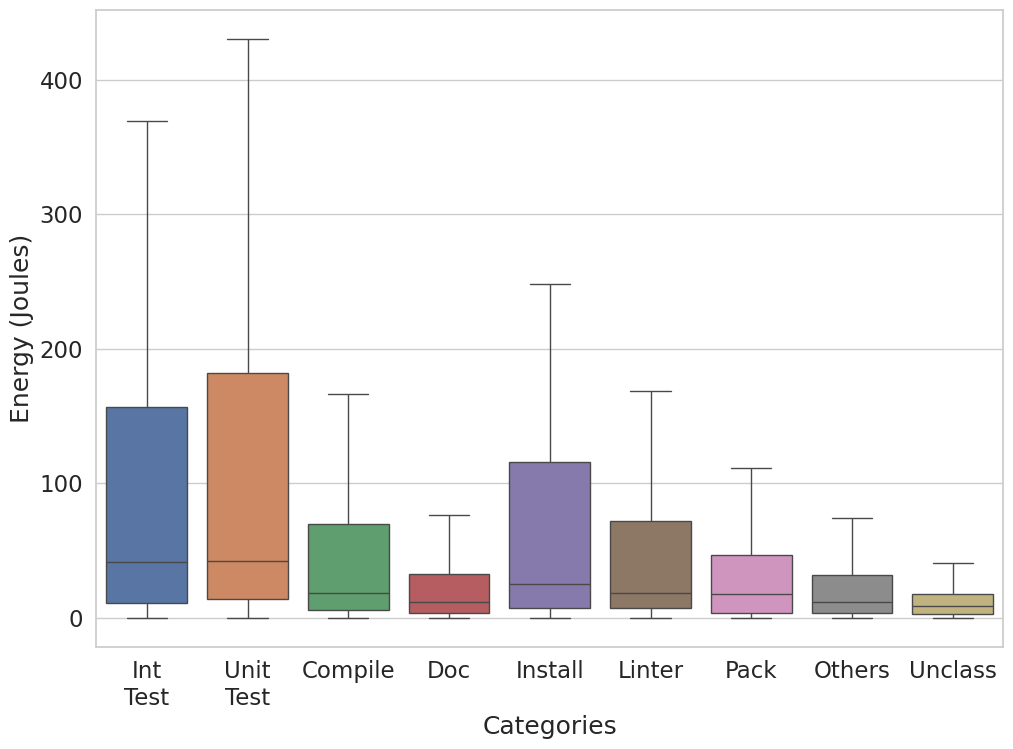

In [19]:
import scipy.stats as stats
from cliffs_delta import cliffs_delta
import seaborn as sns
energy_plot = {}
for key, value in tasks_energy_category['all'].items():
    new_key = categories_short[key].replace(" ", "\n")
    energy_plot[new_key] = value
sns.set_theme(style='whitegrid',font_scale=1.5, rc={'figure.figsize':(11.7,8.27)})

g = sns.boxplot(data = energy_plot, showfliers=False)#, log_scale=10)
g.set_xlabel('Categories')
g.set_ylabel('Energy (Joules)')


#g.set_yscale("log")

Text(0, 0.5, 'Power (Watts)')

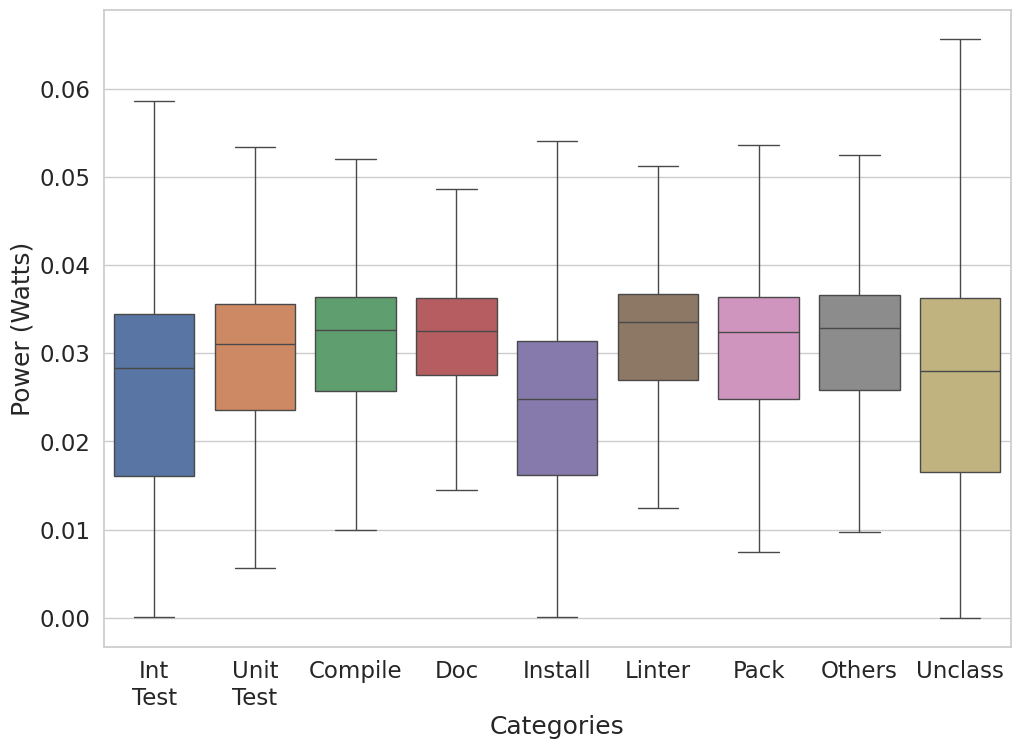

In [20]:
power_plot = {}
for key, value in tasks_power_category['all'].items():
    new_key = categories_short[key].replace(" ", "\n")
    power_plot[new_key] = value

sns.set_theme(style='whitegrid',font_scale=1.5, rc={'figure.figsize':(11.7,8.27)})

g = sns.boxplot(data = power_plot, showfliers=False)#, log_scale=10)
g.set_xlabel('Categories')
g.set_ylabel('Power (Watts)')

#g.set_yscale("log")